# Semana 4 Actividad 

## Profesor : Jobish Vallikavungal Devassia
## Materia   : Ciencia y analítica de datos

### Equipo 17

### Integrantes :

### Kevin Alejandro Garcia Escalante                                    A01376680
### Maria Nelly Porras A                                                          A01723828

### Fecha : 11 de Octubre de 2022

### Objetivo :Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.
##### Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos
##### Interprete cada componente principal en términos de las variables originales
##### Identifique valores atípicos



## 1: Primero se limpia el dataset

In [189]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [190]:
dataset = pd.read_csv('./default of credit card clients.csv',index_col = 'ID') # leer dataset y nombrar como indice a la columna ID
dataset


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [191]:
dataset.columns[:-1] #Todas la columnas menos Y

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [192]:
# Renombrar las columnas 
dataset.columns = ['Amount of the given credit (NT dollar)',
     'Gender' ,
     'Education', 
     'Marital status',
     'Age',
     'Repayment status September 2005' ,
     'Repayment status Agust 2005',
     'Repayment status July 2005',
     'Repayment status June 2005',
     'Repayment status May 2005',
     'Repayment status April 2005',
     'Bill statement in September 2005',
     'Bill statement in Agust 2005',
     'Bill statement in July 2005',
     'Bill statement in June 2005',
     'Bill statement in May 2005',
     'Bill statement in April 2005',
     'Amount paid in September 2005',
     'Amount paid in in Agust 2005',
     'Amount paid in July 2005',
     'Amount paid in June 2005',
     'Amount paid in May 2005',
     'Amount paid in April 2005','Y']
dataset

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,Repayment status September 2005,Repayment status Agust 2005,Repayment status July 2005,Repayment status June 2005,Repayment status May 2005,...,Bill statement in June 2005,Bill statement in May 2005,Bill statement in April 2005,Amount paid in September 2005,Amount paid in in Agust 2005,Amount paid in July 2005,Amount paid in June 2005,Amount paid in May 2005,Amount paid in April 2005,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [193]:
dataset.isnull().values.any() #Verificar si falta algun dato

True

In [194]:
dataset.isnull().any() #Que columnas les falta datos. Si tiene True es por que le falta datos

Amount of the given credit (NT dollar)    False
Gender                                     True
Education                                  True
Marital status                             True
Age                                        True
Repayment status September 2005            True
Repayment status Agust 2005                True
Repayment status July 2005                 True
Repayment status June 2005                 True
Repayment status May 2005                  True
Repayment status April 2005                True
Bill statement in September 2005           True
Bill statement in Agust 2005               True
Bill statement in July 2005                True
Bill statement in June 2005                True
Bill statement in May 2005                 True
Bill statement in April 2005               True
Amount paid in September 2005              True
Amount paid in in Agust 2005               True
Amount paid in July 2005                   True
Amount paid in June 2005                

In [195]:
dataset.describe() # Para visualizar mejor los datos 

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,Repayment status September 2005,Repayment status Agust 2005,Repayment status July 2005,Repayment status June 2005,Repayment status May 2005,...,Bill statement in June 2005,Bill statement in May 2005,Bill statement in April 2005,Amount paid in September 2005,Amount paid in in Agust 2005,Amount paid in July 2005,Amount paid in June 2005,Amount paid in May 2005,Amount paid in April 2005,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


(0.0, 100.0)

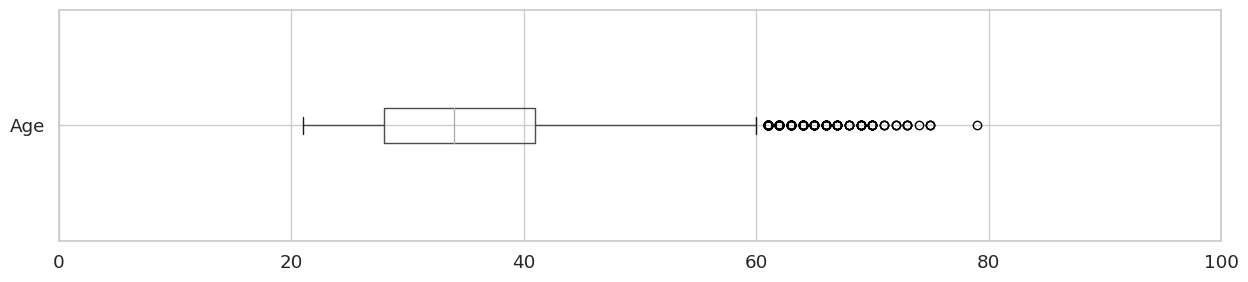

In [196]:
import matplotlib.pyplot as plt   #Revisar la edad por box plot para ver si se puede aplicar la media,mediana en vez de 'Nan'
plt.figure(figsize=(15,3))
dataset.boxplot(column=[ 'Age'],vert=False)
plt.xlim([0, 100])

In [197]:

dataset['Age'].median()



34.0

In [198]:

dataset['Age'].fillna(value=dataset['Age'].mean(), inplace=True)#Reemplazar los Nan por la mediana de la columna Age

In [199]:
dataset = dataset.dropna(axis=0, subset=['Y','Gender','Education','Marital status'])#Eliminar las filas que tiene "Nan"

dataset.isna().any()#Verificar que no falta datos con "Nan" en 'Y','Gender','Education','Marital status' y 'Age'

Amount of the given credit (NT dollar)    False
Gender                                    False
Education                                 False
Marital status                            False
Age                                       False
Repayment status September 2005            True
Repayment status Agust 2005                True
Repayment status July 2005                 True
Repayment status June 2005                 True
Repayment status May 2005                  True
Repayment status April 2005                True
Bill statement in September 2005           True
Bill statement in Agust 2005               True
Bill statement in July 2005                True
Bill statement in June 2005                True
Bill statement in May 2005                 True
Bill statement in April 2005               True
Amount paid in September 2005              True
Amount paid in in Agust 2005               True
Amount paid in July 2005                   True
Amount paid in June 2005                

In [200]:
dataset = dataset[(dataset["Age"] > 30) & (dataset["Age"] < 50)] # Selecciono las personas entre 30 y 50 años
dataset

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,Repayment status September 2005,Repayment status Agust 2005,Repayment status July 2005,Repayment status June 2005,Repayment status May 2005,...,Bill statement in June 2005,Bill statement in May 2005,Bill statement in April 2005,Amount paid in September 2005,Amount paid in in Agust 2005,Amount paid in July 2005,Amount paid in June 2005,Amount paid in May 2005,Amount paid in April 2005,Y
ID,,,,,,,,,,,,,,,,,,,,,
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0
11,200000,2.0,3.0,2.0,34.0,0.0,0.0,2.0,0.0,0.0,...,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [201]:
dataset.groupby(['Age', 'Gender','Repayment status September 2005' ,'Bill statement in September 2005','Amount paid in September 2005',
  ]).size() #

Age   Gender  Repayment status September 2005  Bill statement in September 2005  Amount paid in September 2005
31.0  1.0     -2.0                             -579.0                            579.0                            1
                                               -66.0                             0.0                              1
                                               -23.0                             3125.0                           1
                                               -6.0                              0.0                              1
                                               -1.0                              0.0                              1
                                                                                                                 ..
49.0  2.0      2.0                              91140.0                          4200.0                           1
                                                92033.0                      

In [202]:
dataset.describe() # Para Visualizar mejor los datos

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,Repayment status September 2005,Repayment status Agust 2005,Repayment status July 2005,Repayment status June 2005,Repayment status May 2005,...,Bill statement in June 2005,Bill statement in May 2005,Bill statement in April 2005,Amount paid in September 2005,Amount paid in in Agust 2005,Amount paid in July 2005,Amount paid in June 2005,Amount paid in May 2005,Amount paid in April 2005,Y
count,16303.000000,16303.000000,16303.000000,16303.000000,16303.000000,16303.000000,16302.000000,16300.000000,16301.000000,16298.000000,...,16296.000000,16296.000000,16299.000000,16300.000000,1.630000e+04,16300.000000,16298.000000,16299.000000,16303.000000,16303.000000
mean,191239.016132,1.584678,1.869963,1.409066,38.394127,-0.092069,-0.222856,-0.256564,-0.304030,-0.352743,...,45912.312960,42856.116225,41196.216148,6196.757301,6.684273e+03,5855.546258,5396.413486,5283.928646,5900.990002,0.213826
std,134640.016336,0.492793,0.799119,0.520288,5.173612,1.141095,1.203214,1.191958,1.160157,1.119017,...,68843.093462,65253.150468,63690.186986,17911.856421,2.649232e+04,20004.701903,17432.510022,15951.162762,19886.149305,0.410018
min,10000.000000,1.000000,0.000000,0.000000,31.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80000.000000,1.000000,1.000000,1.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.500000,1351.500000,986.000000,833.750000,7.800000e+02,380.750000,299.000000,232.500000,157.000000,0.000000
50%,170000.000000,2.000000,2.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18666.000000,17517.000000,15936.000000,2327.500000,2.218000e+03,2000.000000,1652.000000,1722.000000,1681.000000,0.000000
75%,270000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59156.250000,54825.500000,52086.500000,5800.000000,5.500000e+03,5000.000000,4852.250000,4990.000000,4825.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,49.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,379267.000000,528666.000000,1.000000


(-3.0, 2.0)

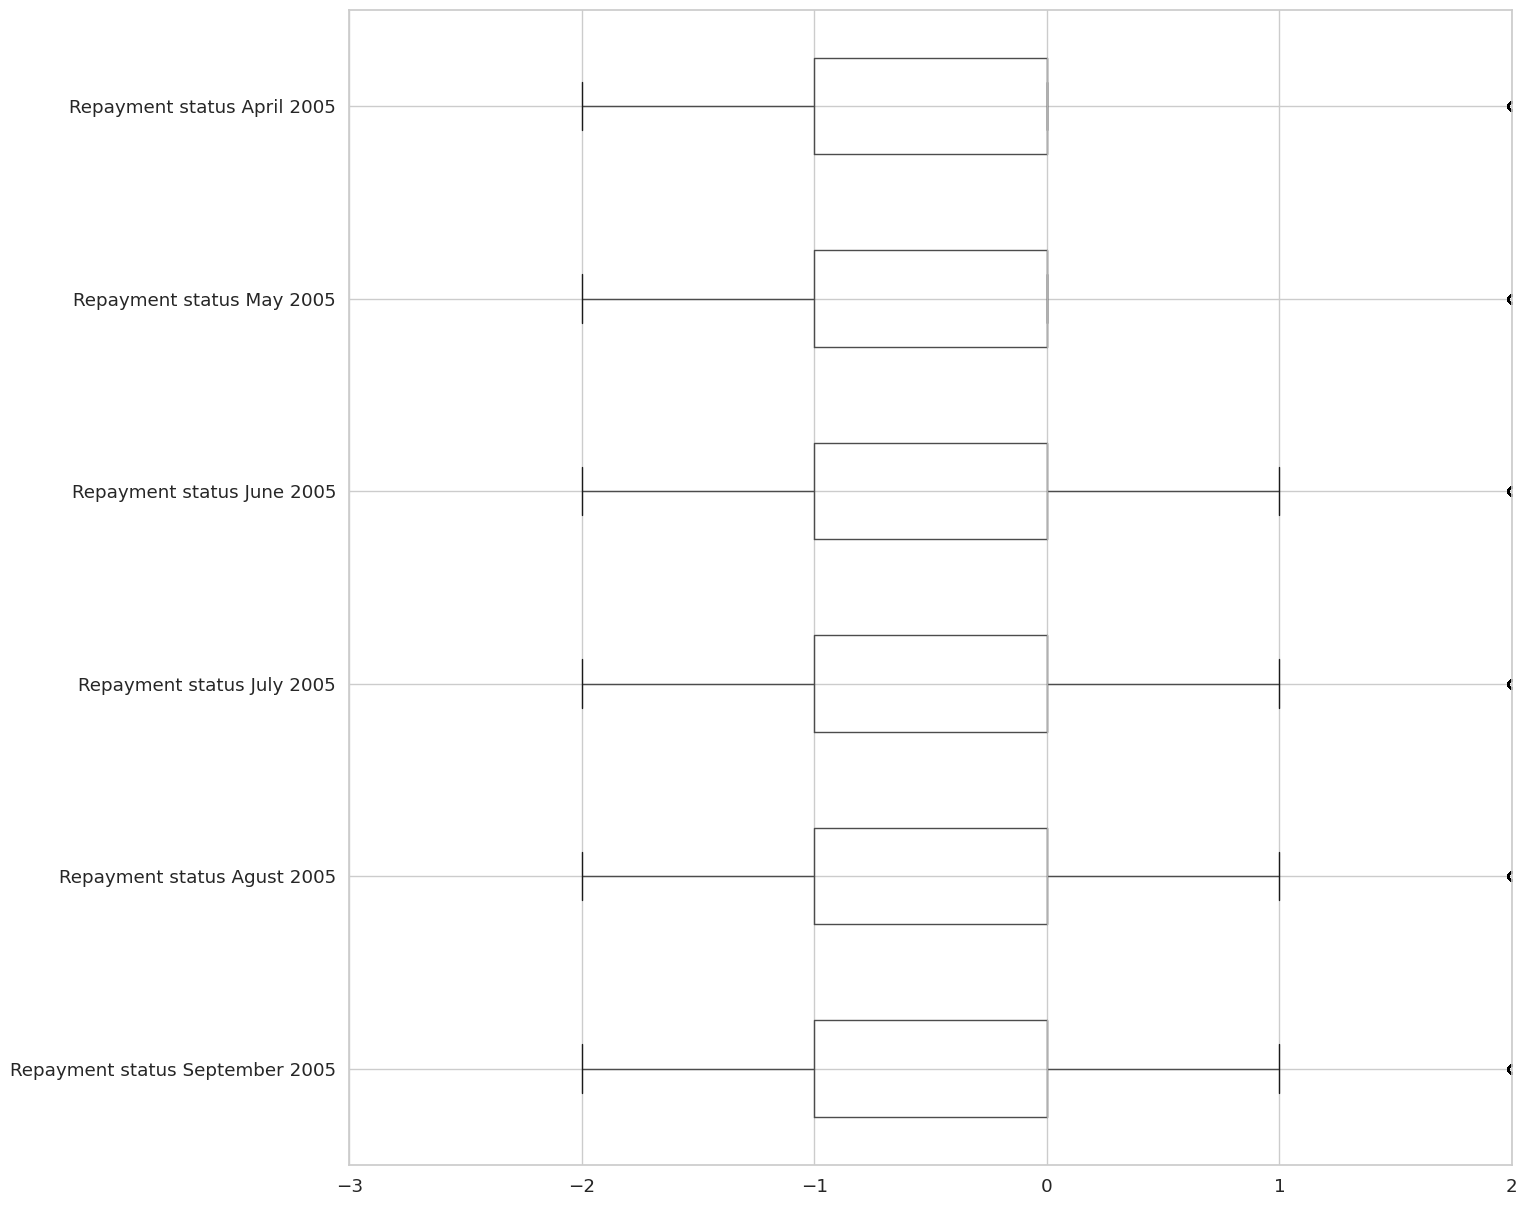

In [203]:
import matplotlib.pyplot as plt   #Revisar por quartiles por box plot el Repayment status de Abril-Septiembre
plt.figure(figsize=(15,15))
dataset.boxplot(column=[ 'Repayment status September 2005','Repayment status Agust 2005',
     'Repayment status July 2005',
     'Repayment status June 2005',
     'Repayment status May 2005',
     'Repayment status April 2005'],vert=False)
plt.xlim([-3, 2])

In [204]:
#Como se tiene la mediana al extremo del box plot entonces esta no es una distribucion normal y por este motivo no escorrecto reemplazar la mediana por los datos "Nan", entonces por tal motivo se prefiere eliminarlos.

dataset = dataset.dropna(subset=['Repayment status September 2005','Repayment status Agust 2005',
     'Repayment status July 2005',
     'Repayment status June 2005',
     'Repayment status May 2005',
     'Repayment status April 2005'])
dataset
dataset.isna().any()#Verificar que no falta datos con "Nan" en 'Y','Gender','Education','Marital status' y 'Age'

Amount of the given credit (NT dollar)    False
Gender                                    False
Education                                 False
Marital status                            False
Age                                       False
Repayment status September 2005           False
Repayment status Agust 2005               False
Repayment status July 2005                False
Repayment status June 2005                False
Repayment status May 2005                 False
Repayment status April 2005               False
Bill statement in September 2005           True
Bill statement in Agust 2005               True
Bill statement in July 2005                True
Bill statement in June 2005                True
Bill statement in May 2005                 True
Bill statement in April 2005               True
Amount paid in September 2005             False
Amount paid in in Agust 2005              False
Amount paid in July 2005                  False
Amount paid in June 2005                

(-3.0, 80000.0)

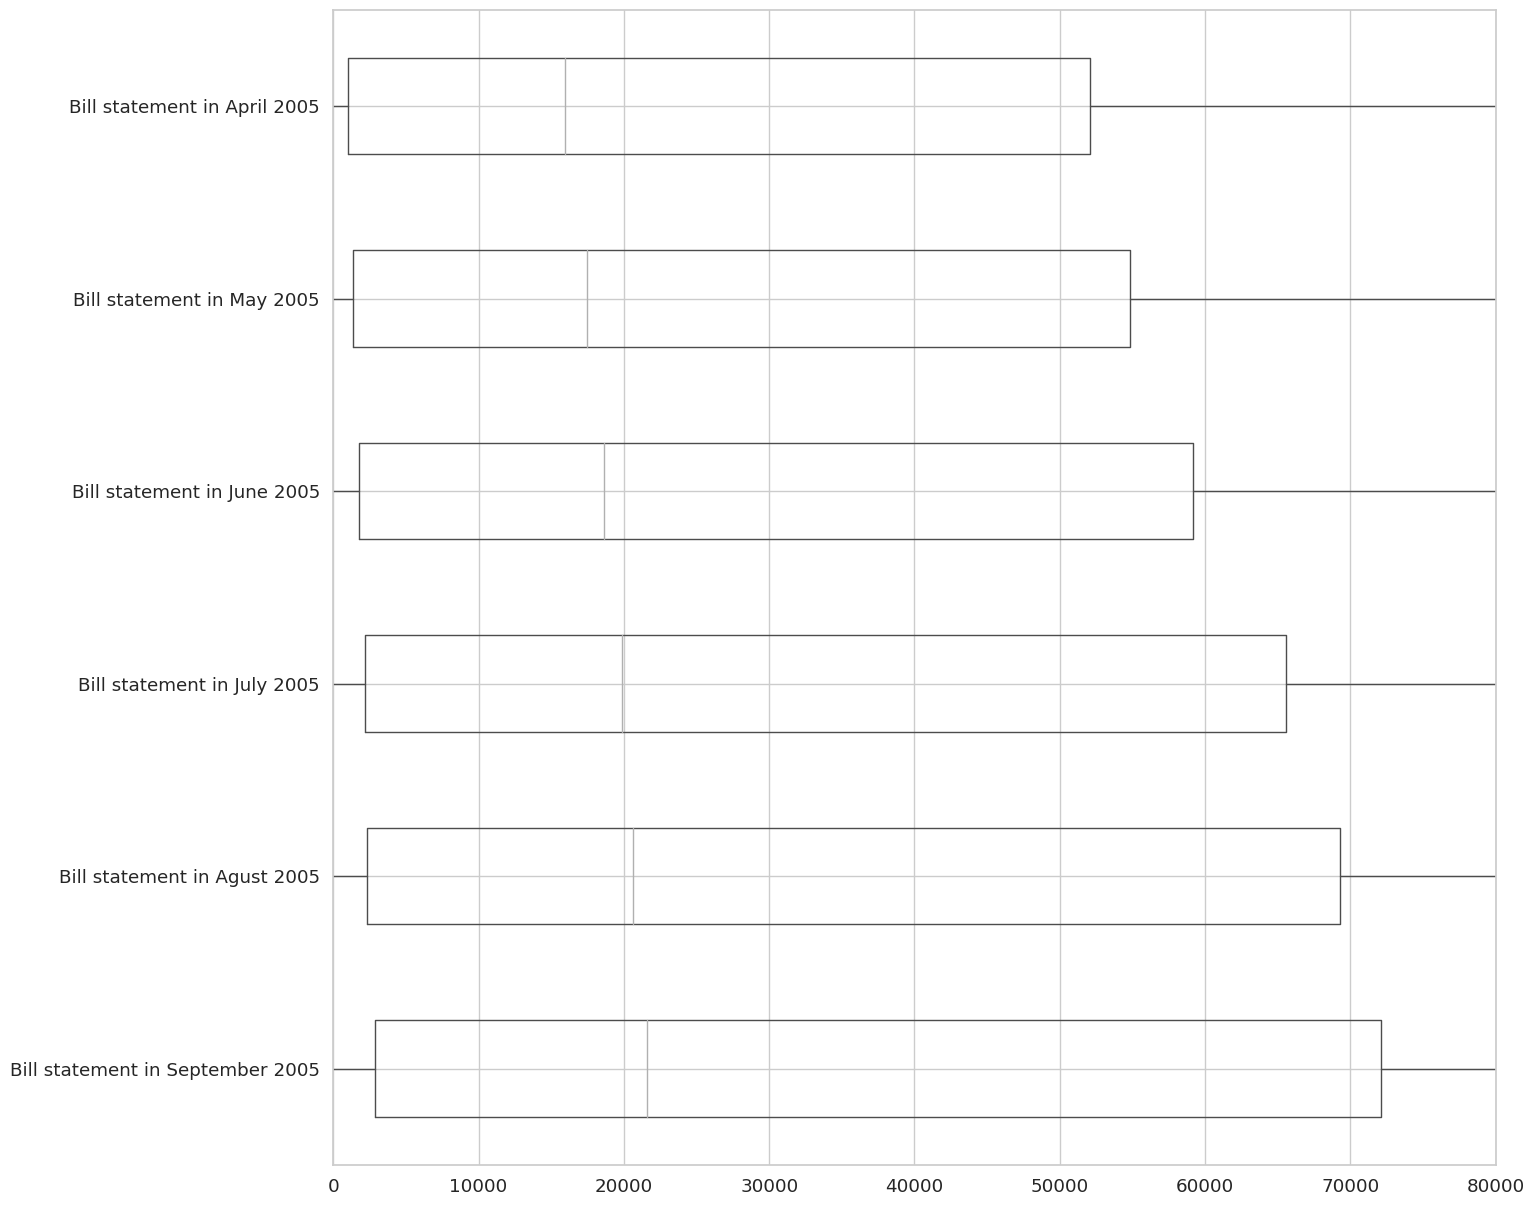

In [205]:
import matplotlib.pyplot as plt   #Revisar por quartiles por box plot el Repayment status de Abril-Septiembre
plt.figure(figsize=(15,15))
dataset.boxplot(column=[ 'Bill statement in September 2005',
     'Bill statement in Agust 2005',
     'Bill statement in July 2005',
     'Bill statement in June 2005',
     'Bill statement in May 2005',
     'Bill statement in April 2005'],vert=False)
plt.xlim([-3,80000])

In [206]:
dataset.columns 

Index(['Amount of the given credit (NT dollar)', 'Gender', 'Education',
       'Marital status', 'Age', 'Repayment status September 2005',
       'Repayment status Agust 2005', 'Repayment status July 2005',
       'Repayment status June 2005', 'Repayment status May 2005',
       'Repayment status April 2005', 'Bill statement in September 2005',
       'Bill statement in Agust 2005', 'Bill statement in July 2005',
       'Bill statement in June 2005', 'Bill statement in May 2005',
       'Bill statement in April 2005', 'Amount paid in September 2005',
       'Amount paid in in Agust 2005', 'Amount paid in July 2005',
       'Amount paid in June 2005', 'Amount paid in May 2005',
       'Amount paid in April 2005', 'Y'],
      dtype='object')

In [207]:
dataset[['Bill statement in September 2005', #Reemplazo los Nan por la mediana de las columnas de Bill statement desde abril a septiembre 
       'Bill statement in Agust 2005', 'Bill statement in July 2005',
       'Bill statement in June 2005', 'Bill statement in May 2005',
       'Bill statement in April 2005']] = dataset[['Bill statement in September 2005',
       'Bill statement in Agust 2005', 'Bill statement in July 2005',
       'Bill statement in June 2005', 'Bill statement in May 2005',
       'Bill statement in April 2005']].fillna(dataset[['Bill statement in September 2005',
       'Bill statement in Agust 2005', 'Bill statement in July 2005',
       'Bill statement in June 2005', 'Bill statement in May 2005',
       'Bill statement in April 2005']].median())

/tmp/ipykernel_12637/3234829901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Bill statement in September 2005', #Reemplazo los Nan por la mediana de las columnas de Bill statement desde abril a septiembre


In [208]:

dataset.isna().any()

Amount of the given credit (NT dollar)    False
Gender                                    False
Education                                 False
Marital status                            False
Age                                       False
Repayment status September 2005           False
Repayment status Agust 2005               False
Repayment status July 2005                False
Repayment status June 2005                False
Repayment status May 2005                 False
Repayment status April 2005               False
Bill statement in September 2005          False
Bill statement in Agust 2005              False
Bill statement in July 2005               False
Bill statement in June 2005               False
Bill statement in May 2005                False
Bill statement in April 2005              False
Amount paid in September 2005             False
Amount paid in in Agust 2005              False
Amount paid in July 2005                  False
Amount paid in June 2005                

(-3.0, 10000.0)

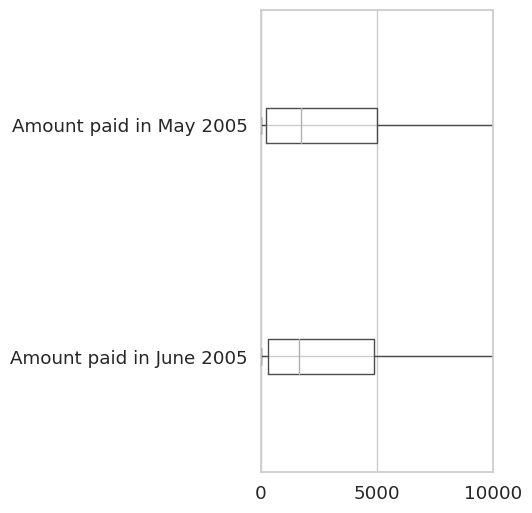

In [209]:
import matplotlib.pyplot as plt   #Revisar por quartiles por box plot el Repayment status de Abril-Septiembre
plt.figure(figsize=(3,6))
dataset.boxplot(column=['Amount paid in June 2005', 'Amount paid in May 2005'],vert=False)
plt.xlim([-3, 10000])

In [210]:
dataset[['Amount paid in June 2005', 'Amount paid in May 2005']] = dataset[['Amount paid in June 2005', #Reemplazo los Nan por la mediana de las columnas de Bill statement desde abril a septiembre 
'Amount paid in May 2005']].fillna(dataset[['Amount paid in June 2005', 'Amount paid in May 2005']].median())




/tmp/ipykernel_12637/1454883148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Amount paid in June 2005', 'Amount paid in May 2005']] = dataset[['Amount paid in June 2005', #Reemplazo los Nan por la mediana de las columnas de Bill statement desde abril a septiembre


In [211]:
dataset.isna().any()

Amount of the given credit (NT dollar)    False
Gender                                    False
Education                                 False
Marital status                            False
Age                                       False
Repayment status September 2005           False
Repayment status Agust 2005               False
Repayment status July 2005                False
Repayment status June 2005                False
Repayment status May 2005                 False
Repayment status April 2005               False
Bill statement in September 2005          False
Bill statement in Agust 2005              False
Bill statement in July 2005               False
Bill statement in June 2005               False
Bill statement in May 2005                False
Bill statement in April 2005              False
Amount paid in September 2005             False
Amount paid in in Agust 2005              False
Amount paid in July 2005                  False
Amount paid in June 2005                

### Ahora que le dataset esta limpio, se procede con el PASO 1

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [212]:
pcs = PCA() 
scale_dataset =  preprocessing.scale (dataset)
pcs.fit(preprocessing.scale (dataset)) #Se aplica PCA y además se hace un scale por que en el dataset hay muchos numeros grandes


PCA()

In [213]:
summary = {'Standard deviation' : np.sqrt(pcs.explained_variance_), #Se obtiene 23 principal components 
           'Proportion of variance' : pcs.explained_variance_ratio_,
           'Cumulative proportion' : np.cumsum(pcs.explained_variance_ratio_)
}
pcsSummary = pd.DataFrame(summary).transpose()
pcsSummary = pcsSummary.round(2)
pcsSummary


                                          

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Standard deviation,2.60,2.02,1.26,1.15,1.02,0.99,0.96,0.95,0.94,0.92,...,0.74,0.63,0.50,0.49,0.42,0.36,0.27,0.2,0.16,0.15
Proportion of variance,0.28,0.17,0.07,0.06,0.04,0.04,0.04,0.04,0.04,0.03,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.28,0.45,0.52,0.57,0.61,0.66,0.69,0.73,0.77,0.80,...,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.0,1.00,1.00


[Text(0.5, 0, 'N-th principal component'), Text(0, 0.5, 'Variance Explained')]

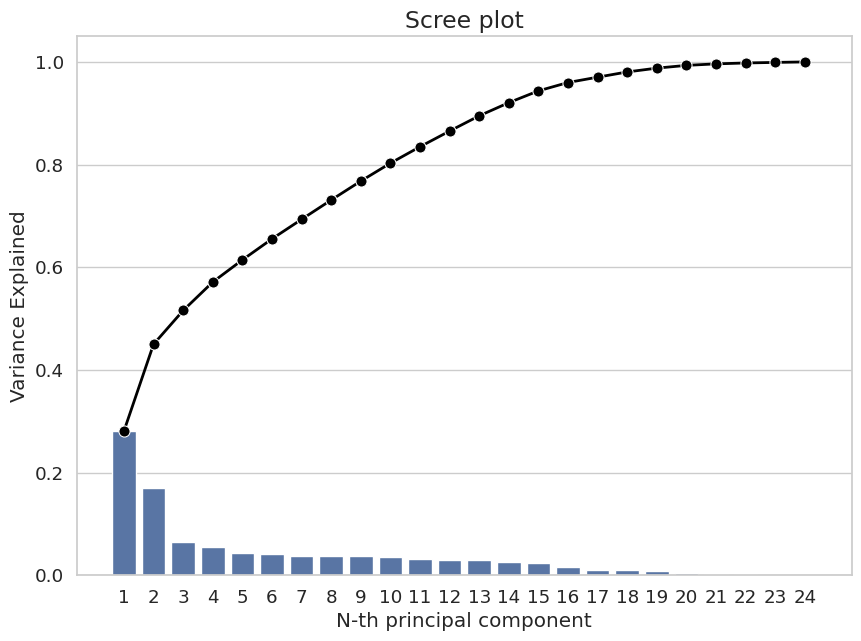

In [214]:
pc_components = np.arange(pcs.n_components_) + 1   #Grafica para poder apreciar mejor los principal components
cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_

scree = sns.set(style = 'whitegrid', font_scale = 1.2)
fig, ax = plt.subplots(figsize = (10, 7))
scree = sns.barplot(x = pc_components,y = vartio, color = 'b')

scree = sns.lineplot(x = pc_components-1,
                    y = cusm,
                    color = 'black',
                    linestyle = '-',
                    linewidth = 2,
                    marker = 'o',
                    markersize = 8)
scree.set_title('Scree plot', fontsize = 17)
scree.set(xlabel = 'N-th principal component', ylabel = 'Variance Explained')


In [215]:
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)] # Se puede apreciar que se necesitan 10 principal components para tener un 80 % de la varianza de los datos
pcsSummary


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,2.60,2.02,1.26,1.15,1.02,0.99,0.96,0.95,0.94,0.92,...,0.74,0.63,0.50,0.49,0.42,0.36,0.27,0.2,0.16,0.15
Proportion of variance,0.28,0.17,0.07,0.06,0.04,0.04,0.04,0.04,0.04,0.03,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.28,0.45,0.52,0.57,0.61,0.66,0.69,0.73,0.77,0.80,...,0.94,0.96,0.97,0.98,0.99,0.99,1.00,1.0,1.00,1.00


#### PUNTO 1 ANSWER: se necesitan 10 principal components para obtener un 80% de la varianza de los datos

In [216]:
pcsCompsDf = pd.DataFrame(pcs.components_.transpose(), #Tabla de factores que tienen mayor aportacion
                         columns = pcsSummary.columns,
                         index = dataset.columns)
pcsCompsDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Amount of the given credit (NT dollar),0.040966,0.320080,0.042601,-0.116012,-0.152909,-0.274581,-0.090003,-0.208042,0.040834,-0.002289,...,-0.821994,0.006067,0.033171,-0.030587,0.009211,0.010542,-0.007695,0.014288,0.000998,0.002370
Gender,-0.028926,0.043135,-0.039731,0.154105,0.699736,-0.587589,0.008686,0.209931,0.016737,-0.004640,...,0.019264,0.017231,0.010625,0.025583,-0.002963,-0.000673,0.002688,-0.000923,0.001175,-0.000157
Education,0.021097,-0.115120,-0.067579,0.490042,0.327807,0.434362,-0.120413,0.324074,-0.130944,-0.149933,...,-0.368151,-0.017039,-0.002112,-0.037114,-0.002092,0.002511,-0.003369,-0.000400,-0.001299,0.002531
Marital status,0.008881,0.004879,0.059404,-0.555957,0.174896,0.445697,-0.044731,0.343849,-0.078001,-0.097636,...,-0.114776,-0.000425,-0.004688,-0.020888,0.000609,0.000606,-0.001733,-0.000099,-0.001661,-0.002063
Age,-0.002170,-0.030030,-0.026626,0.620993,-0.300964,0.118804,-0.008472,-0.112405,0.038934,-0.025913,...,0.009211,-0.012097,-0.003154,-0.011654,0.004084,-0.001130,-0.000392,-0.001241,0.000516,-0.000555
Repayment status September 2005,0.183642,-0.283020,0.013706,-0.020516,-0.124451,-0.106800,-0.002706,0.190315,-0.043521,-0.041343,...,-0.237111,-0.648048,-0.184894,0.105755,0.113786,-0.042036,-0.008256,0.000865,0.002228,0.001107
Repayment status Agust 2005,0.218096,-0.312034,0.062627,-0.018166,-0.043719,-0.051048,-0.063834,0.035629,-0.000487,-0.054540,...,-0.146256,0.325758,0.447978,-0.339211,-0.462309,0.174514,-0.036575,0.012917,-0.004666,0.001365
Repayment status July 2005,0.224038,-0.318264,0.113778,-0.020142,0.018430,-0.026292,-0.056465,-0.072687,-0.006303,-0.021187,...,-0.112063,0.515142,-0.189847,-0.068956,0.595556,-0.343350,0.028227,-0.031718,0.008549,-0.006198
Repayment status June 2005,0.229905,-0.316267,0.144755,-0.028150,0.064118,-0.016989,-0.063042,-0.153994,0.033085,0.056188,...,-0.046266,0.156993,-0.500935,0.351458,-0.215288,0.558451,0.020121,0.002755,-0.013835,-0.000142
Repayment status May 2005,0.233606,-0.298787,0.159433,-0.038832,0.090685,-0.015889,-0.013977,-0.198925,0.071001,0.057673,...,0.024284,-0.171316,0.031348,0.150627,-0.418370,-0.654644,0.028122,0.031390,0.006747,-0.000871


In [217]:
pcsCompsDf.iloc[:, :10] #Las columnas son los principal components y los renglones los factores que se estan analizando

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Amount of the given credit (NT dollar),0.040966,0.320080,0.042601,-0.116012,-0.152909,-0.274581,-0.090003,-0.208042,0.040834,-0.002289
Gender,-0.028926,0.043135,-0.039731,0.154105,0.699736,-0.587589,0.008686,0.209931,0.016737,-0.004640
Education,0.021097,-0.115120,-0.067579,0.490042,0.327807,0.434362,-0.120413,0.324074,-0.130944,-0.149933
Marital status,0.008881,0.004879,0.059404,-0.555957,0.174896,0.445697,-0.044731,0.343849,-0.078001,-0.097636
Age,-0.002170,-0.030030,-0.026626,0.620993,-0.300964,0.118804,-0.008472,-0.112405,0.038934,-0.025913
Repayment status September 2005,0.183642,-0.283020,0.013706,-0.020516,-0.124451,-0.106800,-0.002706,0.190315,-0.043521,-0.041343
Repayment status Agust 2005,0.218096,-0.312034,0.062627,-0.018166,-0.043719,-0.051048,-0.063834,0.035629,-0.000487,-0.054540
Repayment status July 2005,0.224038,-0.318264,0.113778,-0.020142,0.018430,-0.026292,-0.056465,-0.072687,-0.006303,-0.021187
Repayment status June 2005,0.229905,-0.316267,0.144755,-0.028150,0.064118,-0.016989,-0.063042,-0.153994,0.033085,0.056188
Repayment status May 2005,0.233606,-0.298787,0.159433,-0.038832,0.090685,-0.015889,-0.013977,-0.198925,0.071001,0.057673


In [286]:
pcsCompsDf.PC1.abs().nlargest(24) # Los factores mas importantes en principal component 1. 

Bill statement in June 2005               0.341686
Bill statement in May 2005                0.339549
Bill statement in July 2005               0.336092
Bill statement in Agust 2005              0.334009
Bill statement in April 2005              0.332806
Bill statement in September 2005          0.324265
Repayment status May 2005                 0.233606
Repayment status June 2005                0.229905
Repayment status April 2005               0.228115
Repayment status July 2005                0.224038
Repayment status Agust 2005               0.218096
Repayment status September 2005           0.183642
Amount paid in September 2005             0.082080
Amount paid in July 2005                  0.077532
Amount paid in May 2005                   0.070940
Amount paid in in Agust 2005              0.068600
Amount paid in June 2005                  0.068296
Amount paid in April 2005                 0.064129
Y                                         0.047700
Amount of the given credit (NT 

In [287]:
pcsCompsDf.PC2.abs().nlargest(24)# Los factores mas importantes en principal component 2

Amount of the given credit (NT dollar)    0.320080
Repayment status July 2005                0.318264
Repayment status June 2005                0.316267
Repayment status Agust 2005               0.312034
Repayment status May 2005                 0.298787
Repayment status September 2005           0.283020
Repayment status April 2005               0.275680
Y                                         0.174642
Amount paid in July 2005                  0.167729
Bill statement in June 2005               0.167303
Bill statement in July 2005               0.167046
Bill statement in May 2005                0.166186
Amount paid in September 2005             0.166143
Bill statement in April 2005              0.163142
Bill statement in Agust 2005              0.158323
Bill statement in September 2005          0.156715
Amount paid in June 2005                  0.156333
Amount paid in May 2005                   0.153235
Amount paid in in Agust 2005              0.153230
Amount paid in April 2005      

In [288]:
pcsCompsDf.PC3.abs().nlargest(24)# Los factores mas importantes en principal component 3

Amount paid in in Agust 2005              0.409182
Amount paid in September 2005             0.395783
Amount paid in July 2005                  0.390444
Amount paid in June 2005                  0.372113
Amount paid in April 2005                 0.273607
Amount paid in May 2005                   0.239752
Bill statement in September 2005          0.224097
Bill statement in Agust 2005              0.201371
Repayment status April 2005               0.163290
Repayment status May 2005                 0.159433
Repayment status June 2005                0.144755
Bill statement in July 2005               0.139524
Bill statement in June 2005               0.131509
Repayment status July 2005                0.113778
Bill statement in May 2005                0.108565
Bill statement in April 2005              0.103696
Education                                 0.067579
Repayment status Agust 2005               0.062627
Marital status                            0.059404
Amount of the given credit (NT 

In [289]:
pcsCompsDf.PC4.abs().nlargest(24)# Los factores mas importantes en principal component 4

Age                                       0.620993
Marital status                            0.555957
Education                                 0.490042
Gender                                    0.154105
Amount of the given credit (NT dollar)    0.116012
Amount paid in in Agust 2005              0.097452
Amount paid in September 2005             0.079089
Amount paid in July 2005                  0.053681
Amount paid in June 2005                  0.050533
Repayment status May 2005                 0.038832
Repayment status April 2005               0.038368
Amount paid in May 2005                   0.028280
Repayment status June 2005                0.028150
Bill statement in July 2005               0.024723
Repayment status September 2005           0.020516
Repayment status July 2005                0.020142
Repayment status Agust 2005               0.018166
Amount paid in April 2005                 0.014519
Bill statement in Agust 2005              0.008249
Bill statement in June 2005    

In [290]:
pcsCompsDf.PC5.abs().nlargest(24)# Los factores mas importantes en principal component 5

Gender                                    0.699736
Y                                         0.448849
Education                                 0.327807
Age                                       0.300964
Marital status                            0.174896
Amount of the given credit (NT dollar)    0.152909
Repayment status September 2005           0.124451
Repayment status April 2005               0.104014
Repayment status May 2005                 0.090685
Amount paid in May 2005                   0.089198
Repayment status June 2005                0.064118
Amount paid in September 2005             0.058418
Amount paid in in Agust 2005              0.047185
Repayment status Agust 2005               0.043719
Amount paid in April 2005                 0.036591
Repayment status July 2005                0.018430
Bill statement in September 2005          0.018219
Bill statement in May 2005                0.015635
Bill statement in June 2005               0.014395
Bill statement in July 2005    

In [291]:
pcsCompsDf.PC6.abs().nlargest(24)# Los factores mas importantes en principal component 6

Gender                                    0.587589
Marital status                            0.445697
Education                                 0.434362
Y                                         0.353151
Amount of the given credit (NT dollar)    0.274581
Age                                       0.118804
Amount paid in April 2005                 0.111102
Repayment status September 2005           0.106800
Amount paid in in Agust 2005              0.091989
Amount paid in September 2005             0.085878
Repayment status Agust 2005               0.051048
Amount paid in July 2005                  0.047535
Bill statement in July 2005               0.043417
Bill statement in Agust 2005              0.038939
Amount paid in June 2005                  0.035735
Bill statement in September 2005          0.032882
Repayment status July 2005                0.026292
Amount paid in May 2005                   0.025962
Repayment status April 2005               0.024261
Bill statement in June 2005    

In [292]:
pcsCompsDf.PC7.abs().nlargest(24)# Los factores mas importantes en principal component 7

Amount paid in May 2005                   0.635374
Amount paid in April 2005                 0.523515
Amount paid in July 2005                  0.368041
Amount paid in June 2005                  0.238121
Amount paid in September 2005             0.214106
Y                                         0.147672
Bill statement in May 2005                0.124563
Education                                 0.120413
Amount of the given credit (NT dollar)    0.090003
Bill statement in June 2005               0.075194
Repayment status Agust 2005               0.063834
Repayment status June 2005                0.063042
Repayment status July 2005                0.056465
Marital status                            0.044731
Bill statement in July 2005               0.041390
Repayment status April 2005               0.041036
Bill statement in September 2005          0.033661
Bill statement in April 2005              0.022501
Repayment status May 2005                 0.013977
Gender                         

In [293]:
pcsCompsDf.PC8.abs().nlargest(24)# Los factores mas importantes en principal component 8

Y                                         0.655385
Marital status                            0.343849
Education                                 0.324074
Amount paid in May 2005                   0.218166
Gender                                    0.209931
Amount of the given credit (NT dollar)    0.208042
Repayment status April 2005               0.207896
Repayment status May 2005                 0.198925
Repayment status September 2005           0.190315
Amount paid in in Agust 2005              0.172803
Repayment status June 2005                0.153994
Age                                       0.112405
Amount paid in April 2005                 0.090101
Amount paid in July 2005                  0.077044
Repayment status July 2005                0.072687
Bill statement in July 2005               0.054483
Bill statement in April 2005              0.041581
Repayment status Agust 2005               0.035629
Bill statement in September 2005          0.026586
Amount paid in September 2005  

In [294]:
pcsCompsDf.PC9.abs().nlargest(24)# Los factores mas importantes en principal component 9

Amount paid in April 2005                 0.683891
Amount paid in May 2005                   0.541872
Amount paid in September 2005             0.294058
Amount paid in in Agust 2005              0.165339
Y                                         0.161979
Bill statement in April 2005              0.160901
Education                                 0.130944
Amount paid in July 2005                  0.127150
Bill statement in Agust 2005              0.108636
Marital status                            0.078001
Repayment status May 2005                 0.071001
Repayment status April 2005               0.068594
Bill statement in September 2005          0.067808
Repayment status September 2005           0.043521
Amount of the given credit (NT dollar)    0.040834
Age                                       0.038934
Repayment status June 2005                0.033085
Bill statement in July 2005               0.020353
Gender                                    0.016737
Amount paid in June 2005       

In [295]:
pcsCompsDf.PC10.abs().nlargest(24)# Los factores mas importantes en principal component 10

Amount paid in June 2005                  0.668966
Amount paid in in Agust 2005              0.608447
Amount paid in September 2005             0.203959
Bill statement in July 2005               0.191797
Education                                 0.149933
Amount paid in May 2005                   0.144470
Bill statement in April 2005              0.099033
Marital status                            0.097636
Bill statement in May 2005                0.093268
Amount paid in July 2005                  0.081269
Amount paid in April 2005                 0.072004
Bill statement in June 2005               0.071675
Repayment status May 2005                 0.057673
Repayment status June 2005                0.056188
Repayment status Agust 2005               0.054540
Repayment status September 2005           0.041343
Bill statement in September 2005          0.038392
Y                                         0.036548
Age                                       0.025913
Repayment status July 2005     

## Paso 2: Interprete cada componente principal en términos de las variables originales

In [229]:
dataset.corr() # Matriz de correlacion 

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,Repayment status September 2005,Repayment status Agust 2005,Repayment status July 2005,Repayment status June 2005,Repayment status May 2005,...,Bill statement in June 2005,Bill statement in May 2005,Bill statement in April 2005,Amount paid in September 2005,Amount paid in in Agust 2005,Amount paid in July 2005,Amount paid in June 2005,Amount paid in May 2005,Amount paid in April 2005,Y
Amount of the given credit (NT dollar),1.000000,0.032239,-0.269908,-0.019959,-0.063055,-0.266120,-0.294902,-0.286657,-0.268175,-0.242902,...,0.263732,0.266045,0.259893,0.189930,0.169163,0.205436,0.196821,0.219809,0.218468,-0.158863
Gender,0.032239,1.000000,0.047706,-0.069133,-0.030676,-0.079066,-0.090505,-0.086415,-0.083720,-0.076992,...,-0.026615,-0.020824,-0.021574,0.004458,0.004944,-0.002188,0.002849,-0.002364,0.004742,-0.050696
Education,-0.269908,0.047706,1.000000,-0.086763,0.173568,0.110004,0.128812,0.133850,0.127851,0.112961,...,-0.009853,-0.017246,-0.015398,-0.044580,-0.033100,-0.052547,-0.052162,-0.040828,-0.041228,0.019110
Marital status,-0.019959,-0.069133,-0.086763,1.000000,-0.216816,0.002706,0.006116,0.010862,0.016810,0.020810,...,0.015040,0.009377,0.013044,0.012633,0.005812,0.019287,0.007658,0.018762,0.010684,-0.024520
Age,-0.063055,-0.030676,0.173568,-0.216816,1.000000,0.015109,0.020184,0.017040,0.015873,0.008143,...,-0.018158,-0.020484,-0.018923,-0.000165,0.000963,-0.003424,-0.007417,-0.001776,-0.018508,0.038548
Repayment status September 2005,-0.266120,-0.079066,0.110004,0.002706,0.015109,1.000000,0.672736,0.586931,0.553636,0.518829,...,0.212709,0.214189,0.210641,-0.076328,-0.066458,-0.065561,-0.060545,-0.058284,-0.055412,0.314749
Repayment status Agust 2005,-0.294902,-0.090505,0.128812,0.006116,0.020184,0.672736,1.000000,0.783429,0.677869,0.637106,...,0.258188,0.256592,0.255640,-0.074531,-0.054756,-0.049552,-0.042669,-0.031412,-0.033702,0.261268
Repayment status July 2005,-0.286657,-0.086415,0.133850,0.010862,0.017040,0.586931,0.783429,1.000000,0.788120,0.696130,...,0.263214,0.260210,0.257675,0.001365,-0.058688,-0.046912,-0.038675,-0.029454,-0.028813,0.233681
Repayment status June 2005,-0.268175,-0.083720,0.127851,0.016810,0.015873,0.553636,0.677869,0.788120,1.000000,0.820964,...,0.282027,0.278151,0.273263,-0.007303,0.001582,-0.061870,-0.037467,-0.029368,-0.017129,0.216787
Repayment status May 2005,-0.242902,-0.076992,0.112961,0.020810,0.008143,0.518829,0.637106,0.696130,0.820964,1.000000,...,0.311406,0.307918,0.300848,-0.001154,-0.001747,0.014624,-0.049492,-0.023111,-0.014684,0.197135


#### PUNTO 2 ANSWER: Se aprecian los valores orginales, Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable

## Paso 3: Identifique valores atípicos

In [238]:
dataset[dataset.columns] = scale_dataset

/tmp/ipykernel_12637/1571317442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns] = scale_dataset


(-3.0, 3.0)

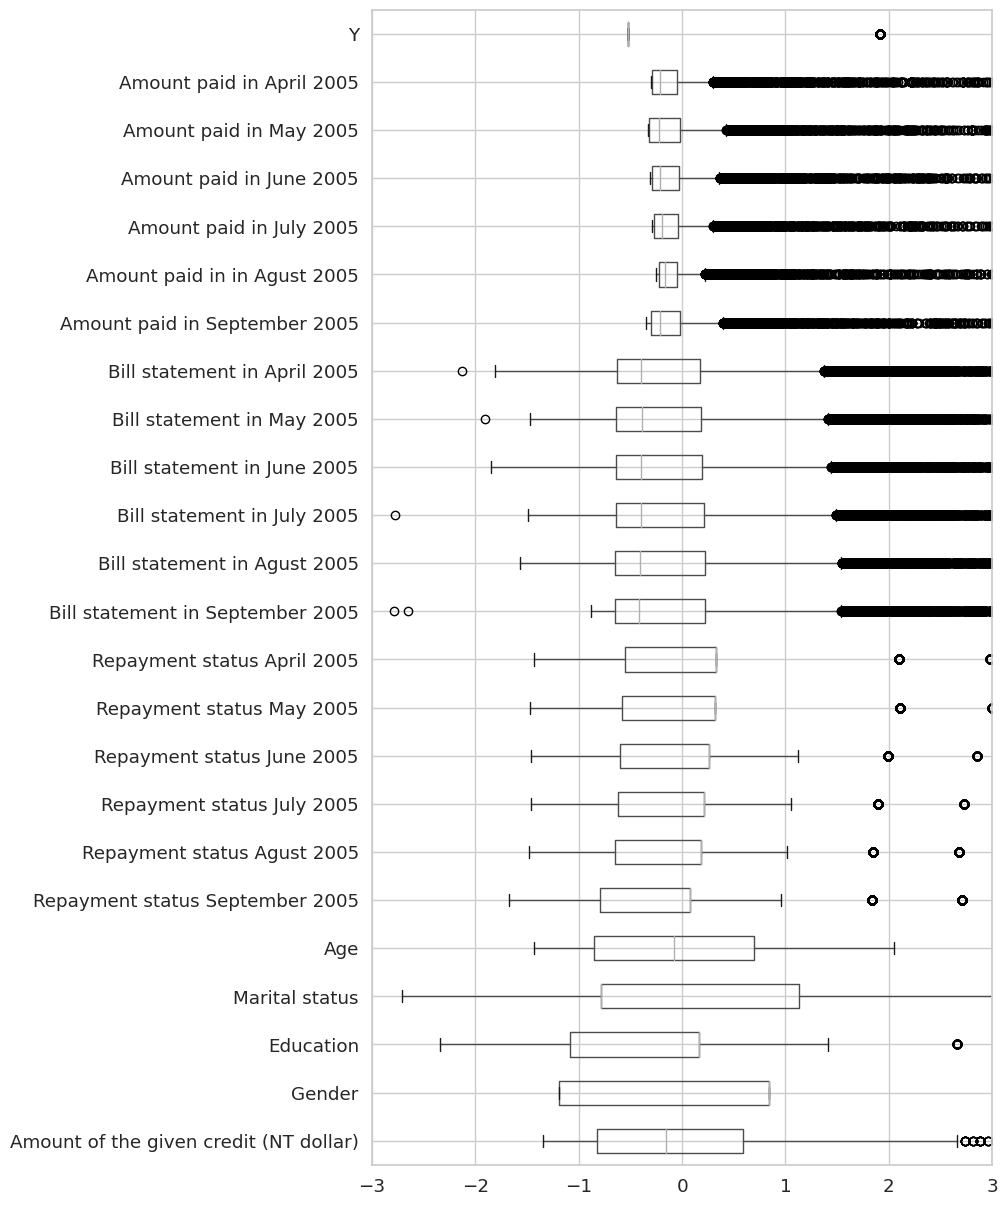

In [255]:
import matplotlib.pyplot as plt   #Revisar por quartiles por box plot el Repayment status de Abril-Septiembre
plt.figure(figsize=(8,15))
dataset.boxplot(column= list(dataset.columns),vert=False)
plt.xlim([-3,3])

#### PUNTO 3 ANSWER: Box plot de valores atípicos

### ¿Cuál es el número de componentes mínimo y por qué?
RESP : Es 10 por que con esos 10 principal components determine el 80% de la varianza de los datos y creo que ese valor es suficiente.

### ¿Cuál es la variación de los datos que representan esos componentes?
RESP : La variacion de los principal components esta en una gráfica mas arriba , pero de todas formas se lo presenta acá en forma vectorial en orden desde el PC1 hasta el PC10 [0.28	0.17	0.07	0.06	0.04	0.04	0.04	0.04	0.04	0.03]

### ¿Cuál es la pérdida de información después de realizar PCA?
RESP :Hay una perdia por que no se toma a todos los principal components, sólo alos que tiene mayor varianza

### De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
RESP :De las variables originales en los principal componenets la que tiene mayor importancia es 'Age'  y el que menor importancia tiene es 'Repayment status Agust 2005'    

### ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
RESP :Se recomienda hacer cuando se tiene demasiados datos, entonces para reducir el número de variables de forma que pasemos a tener el mínimo número de nuevas variables y que representen a todas las antiguas variables de la forma más representativa posible. De esta forma tambien para los cálculos que realice el procesador sean más rapidos y ahorre tiempo.